In [1]:
# Importing the common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Read the CSV file
country_df = pd.read_csv("Country-data.csv")

In [3]:
#Checking the head of the country dataframe
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#EDA -> to check the info of the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#EDA -> Checking for the Outlier by min, max and mean
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Chekcing the shape of the dataframe
country_df.shape

(167, 10)

In [7]:
# Chekcing the country is unique or not, Like some country is duplicate or not
country_df.country.value_counts()

Mozambique                  1
Zambia                      1
Japan                       1
Malta                       1
Eritrea                     1
                           ..
Uganda                      1
Mongolia                    1
India                       1
Russia                      1
Central African Republic    1
Name: country, Length: 167, dtype: int64

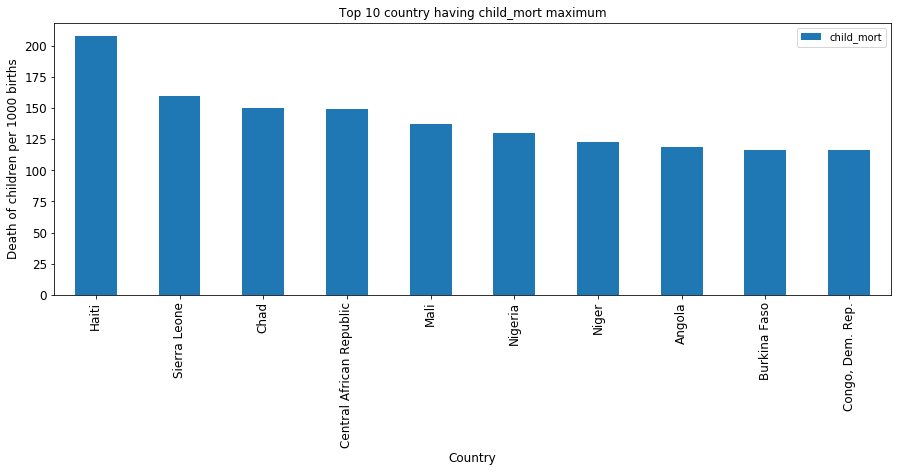

In [8]:
# Before clustring checking that top 10 country which has maximum child death, just to validate the dataframe
child_mort_df = country_df.sort_values('child_mort', ascending=False).head(10)
child_mort_df.set_index('country')
barplt = child_mort_df.plot(x = 'country',y='child_mort', rot=0,kind='bar', title ="Top 10 country having child_mort maximum", figsize=(15, 5), legend=True, fontsize=12)
barplt.set_xlabel("Country", fontsize=12)
barplt.set_ylabel("Death of children per 1000 births", fontsize=12)
plt.xticks(rotation=90)
plt.show() 

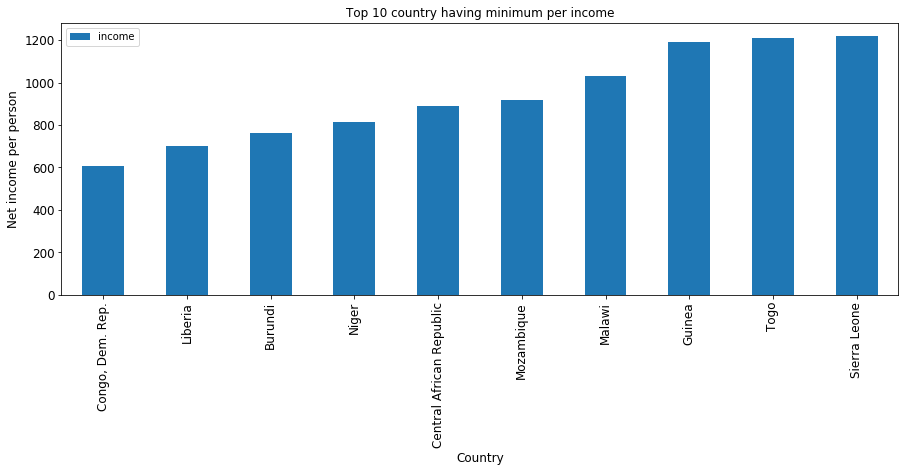

In [9]:
# Before clustring checking that top 10 country which has minimum income per person, just to validate the dataframe
income_df = country_df.sort_values('income', ascending=True).head(10)
income_df.set_index('country')
barplt = income_df.plot(x = 'country',y='income', rot=0,kind='bar', title ="Top 10 country having minimum per income", figsize=(15, 5), legend=True, fontsize=12)
barplt.set_xlabel("Country", fontsize=12)
barplt.set_ylabel("Net income per person", fontsize=12)
plt.xticks(rotation=90)
plt.show() 

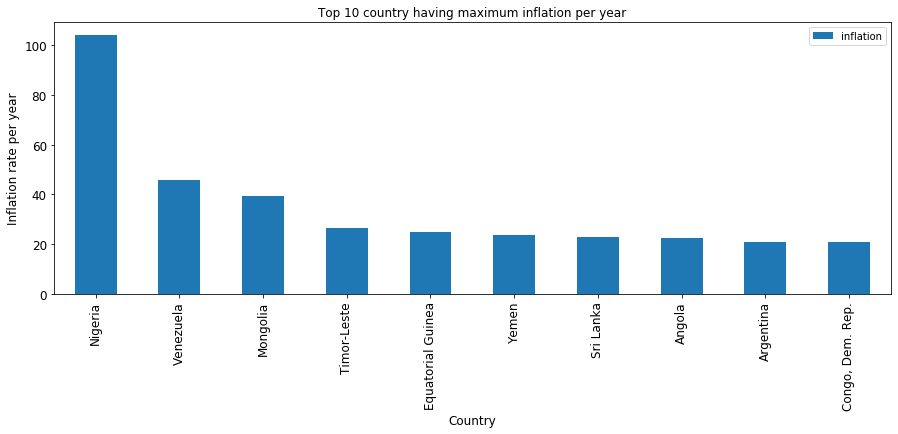

In [10]:
# Before clustring checking that top 10 country which has maximum inflation rate, just to validate the dataframe
inflation_df = country_df.sort_values('inflation', ascending = False).head(10)
inflation_df.set_index('country')
barplt = inflation_df.plot(x = 'country',y='inflation', rot=0,kind='bar', title ="Top 10 country having maximum inflation per year", figsize=(15, 5), legend=True, fontsize=12)
barplt.set_xlabel("Country", fontsize=12)
barplt.set_ylabel("Inflation rate per year", fontsize=12)
plt.xticks(rotation=90)
plt.show() 

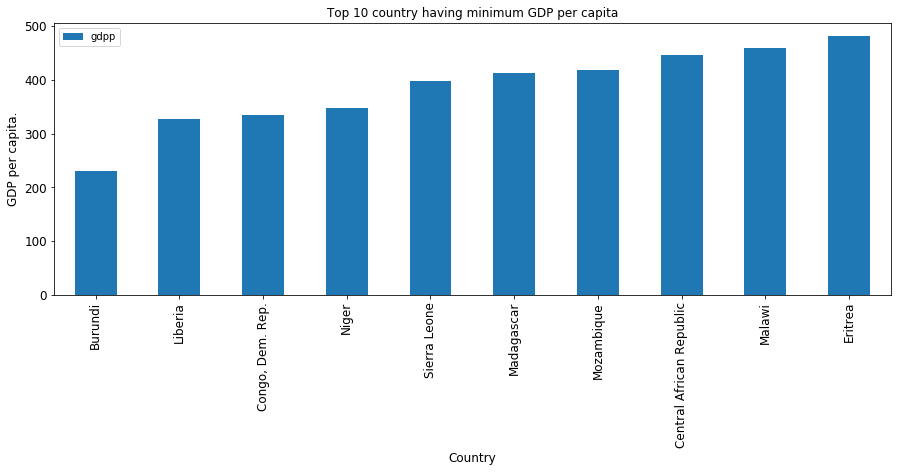

In [11]:
# Before clustring checking that top 10 country which has minimum GDP per capita, just to validate the dataframe
gdpp_df = country_df.sort_values('gdpp', ascending = True).head(10)
gdpp_df.set_index('country')
barplt = gdpp_df.plot(x = 'country',y='gdpp', rot=0,kind='bar', title ="Top 10 country having minimum GDP per capita", figsize=(15, 5), legend=True, fontsize=12)
barplt.set_xlabel("Country", fontsize=12)
barplt.set_ylabel("GDP per capita.", fontsize=12)
plt.xticks(rotation=90)
plt.show() 

In [12]:
#Finding the percentage of missing values:-
percent_missing = country_df.isnull().sum() * 100 / len(country_df)
missing_value_df = pd.DataFrame({'column_name': country_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df) 
# After this analysis we can see that dataframe does not have missing values.

           column_name  percent_missing
country        country              0.0
child_mort  child_mort              0.0
exports        exports              0.0
health          health              0.0
imports        imports              0.0
income          income              0.0
inflation    inflation              0.0
life_expec  life_expec              0.0
total_fer    total_fer              0.0
gdpp              gdpp              0.0


In [13]:
# There are few (below) columns whose values are in percentage that needs to be changed into absolute value
country_df['exports'] = (country_df['exports']*country_df['gdpp'])/100
country_df['imports'] = (country_df['imports']*country_df['gdpp'])/100
country_df['health'] = (country_df['health']*country_df['gdpp'])/100

In [14]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [15]:
# Adding unique ID column to the datafrmae 
country_df["ID"] = 1000 + country_df.index
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1000
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1001
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1002
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1003
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1004


## PCA Calculation

In [16]:
# Creating dummy dataframe for Id and country name
dummy_df = country_df[['country','ID']]
dummy_df.head()

,country,ID
0,Afghanistan,1000
1,Albania,1001
2,Algeria,1002
3,Angola,1003
4,Antigua and Barbuda,1004


In [17]:
# For PCA analysis just taking only numeric caolumns and removing country and id coulms, we will add them after PCA
country_df_PCA = country_df.drop(['country','ID'], axis=1)
country_df_PCA.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


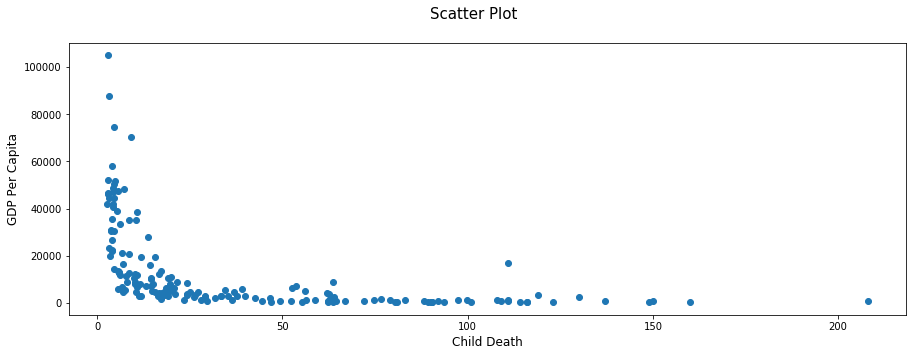

In [18]:
# Viusulizing two features to check for the cluster formation
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot', fontsize=15)
plt.scatter(x = 'child_mort', y = 'gdpp', data = country_df)
plt.xlabel('Child Death', fontsize=12)
plt.ylabel('GDP Per Capita', fontsize=12)
plt.show()

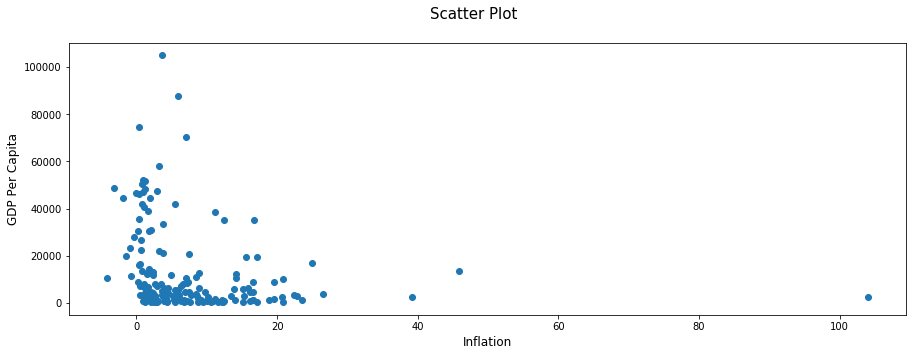

In [19]:
# Viusulizing two features to check for the cluster formation
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot', fontsize=15)
plt.scatter(x = 'inflation', y = 'gdpp', data = country_df)
plt.xlabel('Inflation', fontsize=12)
plt.ylabel('GDP Per Capita', fontsize=12)
plt.show()

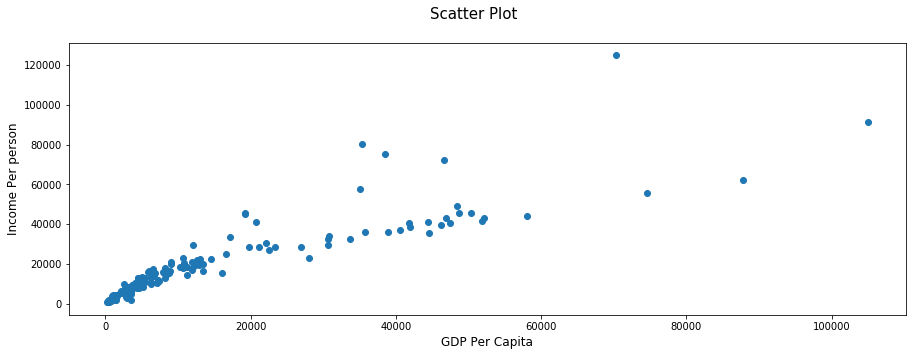

In [20]:
# Viusulizing two features to check for the cluster formation
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot', fontsize=15)
plt.scatter(x = 'gdpp', y = 'income', data = country_df)
plt.xlabel('GDP Per Capita', fontsize=12)
plt.ylabel('Income Per person', fontsize=12)
plt.show()

In [21]:
# Scaling the Dataframe to get the dataframe into similar scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
PCA_df = scaler.fit_transform(country_df_PCA)

In [22]:
#Chekcing the scaled dataframe
PCA_df

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [23]:
# Import PCA module and doing PCA on the scaled dataframe
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(PCA_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

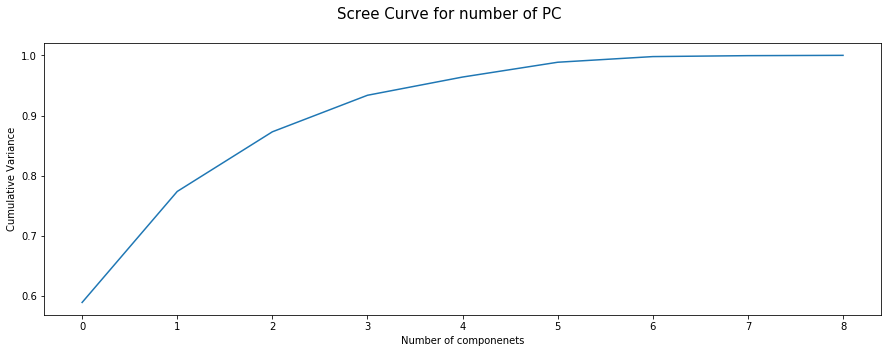

In [24]:
## Scree plot to check how many number of component we should consider to get the maximum variance with small number of component
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scree Curve for number of PC', fontsize=15)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of componenets')
plt.ylabel('Cumulative Variance')
plt.show()

In [25]:
# So from above analysis we can see that 4 component is good for our analysis, as it gives more than 95% variance

In [26]:
# Let's take n_components = 4
# And applying incremental PCA analysis to transform our dataframe
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)
PCA_df_final = pca_final.fit_transform(PCA_df)

In [27]:
# Creating another dataframe with the generated 4 component
PCA_df_final = pd.DataFrame(PCA_df_final)
PCA_df_final.columns = ['PC1', 'PC2', 'PC3', 'PC4']
PCA_df_final.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [28]:
# Adding country name to the new dataframe
PCA_df_with_ID = pd.concat([dummy_df, PCA_df_final], axis = 1)
PCA_df_with_ID.head()

,country,ID,PC1,PC2,PC3,PC4
0,Afghanistan,1000,-2.636647,1.472085,-0.546500,0.237267
1,Albania,1001,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,1002,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,1003,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,1004,0.648777,-1.026498,-0.244170,-0.267513


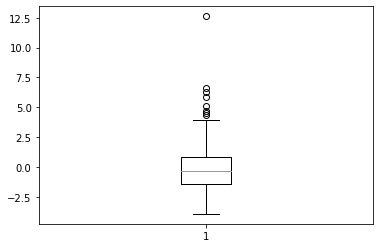

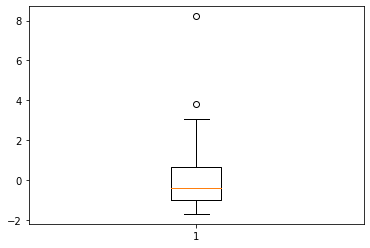

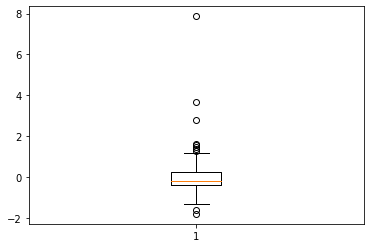

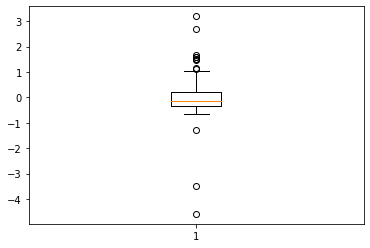

In [29]:
# Checking for the outlier for the 4 principal component
for col in PCA_df_final.columns:
    plt.boxplot(PCA_df_final[col])
    plt.show()

So from above boxplot we can see that only for PC3 there are more outlier and for other seems to be few outliers, so if remove the outlier for the dataframe then it will remove more rows basis on PC3 values only, hence we can cap it to the max value so it would be better for our analysis.


In [30]:
# OutLier detectation for PC1
#Q1 = PCA_df_final['PC1'].quantile(0.05)
#Q3 = PCA_df_final['PC1'].quantile(0.95)
#PCA_df_final['PC1'] = PCA_df_final['PC1'].apply(lambda x : [Q1 if y < Q1 for y in x])

In [31]:
# Checking min max before outlier treatment
print(PCA_df_final['PC1'].max())
print(PCA_df_final['PC1'].min())
print(PCA_df_final['PC2'].max())
print(PCA_df_final['PC2'].min())
print(PCA_df_final['PC3'].max())
print(PCA_df_final['PC3'].min())
print(PCA_df_final['PC4'].max())
print(PCA_df_final['PC4'].min())

12.633633832541173
-3.938183845612863
8.219800362242887
-1.7006596116463488
7.8678979994495295
-1.7988631659172376
3.195655300555163
-4.587245051259026


In [32]:
# for outlier, we are capping the cloumns values to .01% and .99% depending upon their values
for col in PCA_df_final.columns:
    percentiles = PCA_df_final[col].quantile([0.01,0.99]).values
    PCA_df_final[col][PCA_df_final[col] <= percentiles[0]] = percentiles[0]
    PCA_df_final[col][PCA_df_final[col] >= percentiles[1]] = percentiles[1]

In [33]:
# After outlier treatment checking the min max value for coulms, And it has chnaged
print(PCA_df_final['PC1'].max())
print(PCA_df_final['PC1'].min())
print(PCA_df_final['PC2'].max())
print(PCA_df_final['PC2'].min())
print(PCA_df_final['PC3'].max())
print(PCA_df_final['PC3'].min())
print(PCA_df_final['PC4'].max())
print(PCA_df_final['PC4'].min())

6.374109354533677
-3.4738276970780158
3.310386001696095
-1.4801463099553156
3.073894267206879
-1.4139347678801821
2.0195217278337925
-2.029835613546417


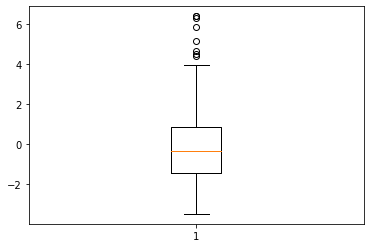

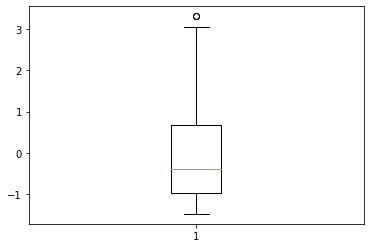

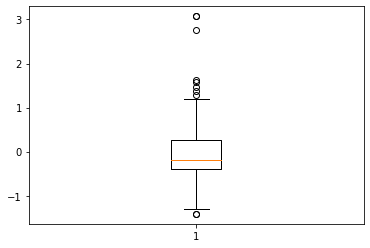

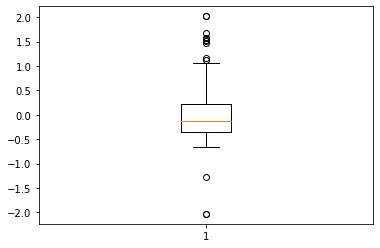

In [34]:
# Checking the datafrmae after outlier treatment
for col in PCA_df_final.columns:
    plt.boxplot(PCA_df_final[col])
    plt.show()

In [35]:
#Cheking the shape after the outlier treatment
PCA_df_final.shape

(167, 4)

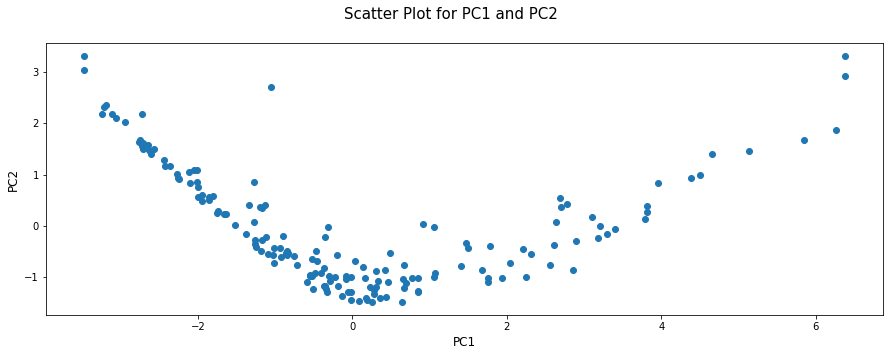

In [36]:
# Visulization for the first two principal componenets for the cluster analysis
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot for PC1 and PC2', fontsize=15)
plt.scatter(x = 'PC1', y = 'PC2', data = PCA_df_final)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

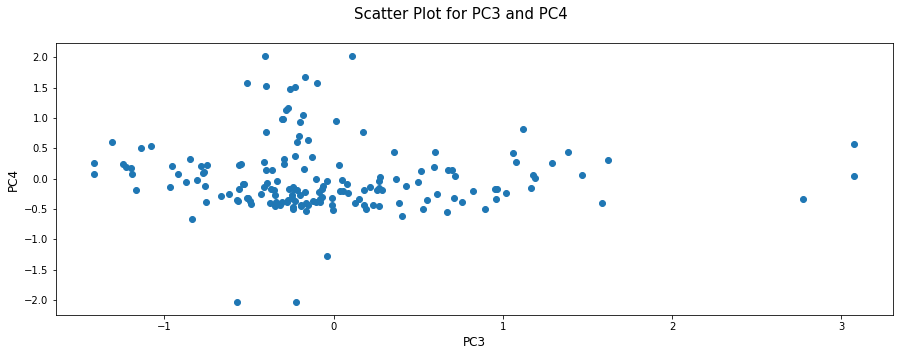

In [37]:
# Visulization for the next two principal componenets for the cluster analysis
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot for PC3 and PC4', fontsize=15)
plt.scatter(x = 'PC3', y = 'PC4', data = PCA_df_final)
plt.xlabel('PC3', fontsize=12)
plt.ylabel('PC4', fontsize=12)
plt.show()

In [38]:
# Adding country column again to map
PCA_df_with_ID = pd.concat([dummy_df, PCA_df_final], axis = 1)
PCA_df_with_ID.head()

,country,ID,PC1,PC2,PC3,PC4
0,Afghanistan,1000,-2.636647,1.472085,-0.546500,0.237267
1,Albania,1001,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,1002,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,1003,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,1004,0.648777,-1.026498,-0.244170,-0.267513


## Applying K-Means Algorithem

In [39]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
#Calculating the Hopkins score to check for randomization for our data frame
hopkins(PCA_df_final)


0.8691459704370161

- A Hopkin of Zero: That your data is completely random, It doesn't have any visible clusters
- A Hopking of 50%: Not random but not so good for clustering
- A hopkin of >75% : JUST GOOD
- A hopkin of >85%: Very good for clustering

In [41]:
#So we can say that data is good for clustring, as hopkins score is good for our analysis
# now we will check for the silhouette score to anlysie for the K-value

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

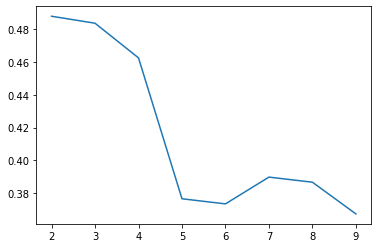

In [42]:
# Check the optimal K
# sILHOUETTE
#Elbow
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(PCA_df_final)
    sil.append([k, silhouette_score(PCA_df_final, kmeans.labels_)])
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])
plt.show()

From the above silhoutte curve we can see that n=3 gives a good shiloutte value

In [43]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(PCA_df_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(PCA_df_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4880872677284147
For n_clusters=3, the silhouette score is 0.48381847399132566
For n_clusters=4, the silhouette score is 0.46399637278028255
For n_clusters=5, the silhouette score is 0.37457163556909795
For n_clusters=6, the silhouette score is 0.38945170188529615
For n_clusters=7, the silhouette score is 0.375383591269722
For n_clusters=8, the silhouette score is 0.3857864886956454


From the above silhoutte score we can see that n=3 gives a good shiloutte value

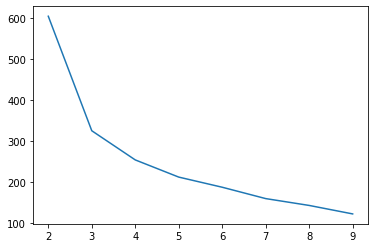

In [44]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(PCA_df_final)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

- So from the above two curve we can predict that k = 3 will gonna give the good clusters, as it forms the elbow at k = 3

In [45]:
# K = 3
# modelling our dataframe on the basis of 3 clusters using K-Means algo
model_clus3 = KMeans(n_clusters = 3, random_state = 50)
model_clus3.fit(PCA_df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [46]:
#checking the created labels after applying k-Means algo
model_clus3.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [47]:
# Adding cluster id to the original dataset
PCA_df_with_ID['ClusterId_KMeans'] = model_clus3.labels_
PCA_df_with_ID.head()

,country,ID,PC1,PC2,PC3,PC4,ClusterId_KMeans
0,Afghanistan,1000,-2.636647,1.472085,-0.546500,0.237267,1
1,Albania,1001,-0.023845,-1.435816,-0.009080,-0.442921,2
2,Algeria,1002,-0.459260,-0.678794,0.967852,-0.176389,2
3,Angola,1003,-2.723581,2.176018,0.597794,0.438919,1
4,Antigua and Barbuda,1004,0.648777,-1.026498,-0.244170,-0.267513,2


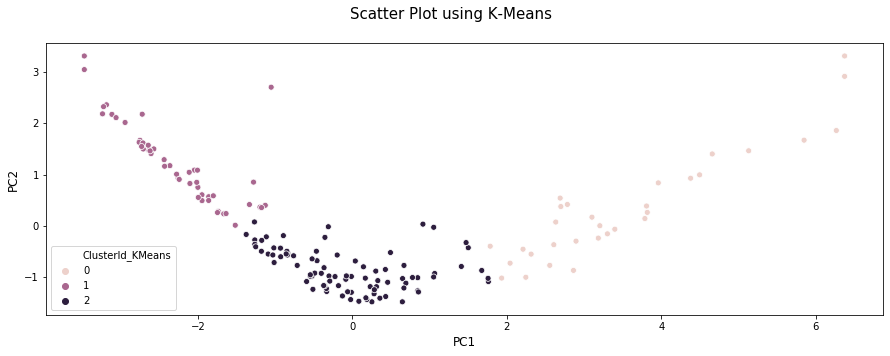

In [48]:
#Depending upon K-means we got 3 clusters and checking these datapoints using scatter plot for first 2 principal component
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot using K-Means', fontsize=15)
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'ClusterId_KMeans', data = PCA_df_with_ID)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

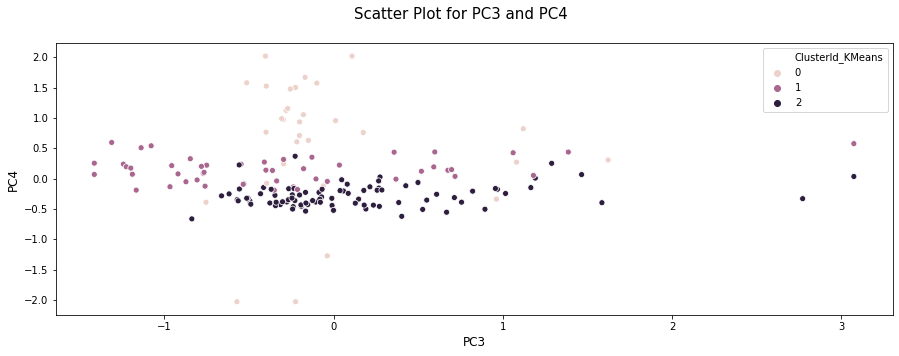

In [49]:
#Depending upon K-means we got 3 clusters and checking these datapoints using scatter plot for next 2 principal component
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot for PC3 and PC4', fontsize=15)
sns.scatterplot(x = 'PC3', y= 'PC4', hue = 'ClusterId_KMeans', data = PCA_df_with_ID)
plt.xlabel('PC3', fontsize=12)
plt.ylabel('PC4', fontsize=12)
plt.show()

In [50]:
# adding labels to the origional dataframe
country_df['ClusterId_KMeans'] = model_clus3.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterId_KMeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1000,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1001,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1002,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1003,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1004,2


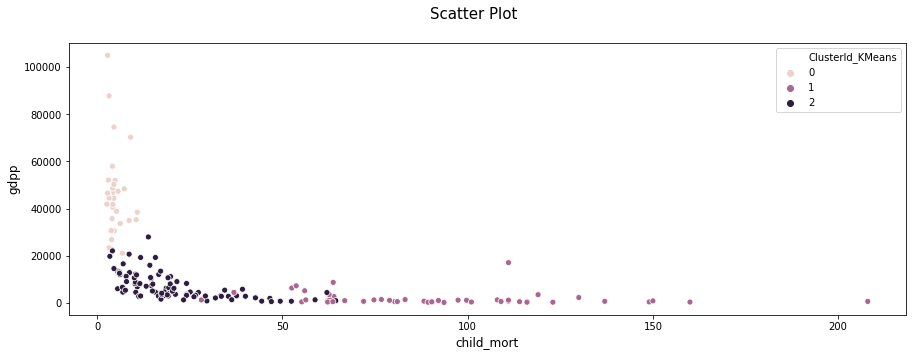

In [51]:
# cheking our origional dataframe on the basis of created clusters
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot', fontsize=15)
sns.scatterplot(x = 'child_mort', y= 'gdpp', hue = 'ClusterId_KMeans', data = country_df)
plt.xlabel('child_mort', fontsize=12)
plt.ylabel('gdpp', fontsize=12)
plt.show()

In [52]:
# Cheking the size of each cluster
country_df['ClusterId_KMeans'].value_counts()

2    88
1    48
0    31
Name: ClusterId_KMeans, dtype: int64

## Hierarchical Clustering

In [53]:
#  rescaling
# instantiate
#scaler = StandardScaler()
# fit_transform
#PCA_df_scaled = scaler.fit_transform(PCA_df_final)
#PCA_df_scaled.shape

In [54]:
PCA_df_scaled = PCA_df_final

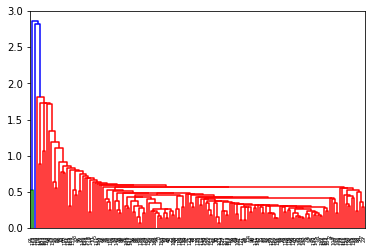

In [55]:
# single linkage
# performing single linkage on the dataframe to see the dendograms
mergings = linkage(PCA_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

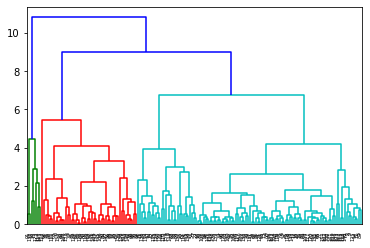

In [56]:
# complete linkage
# performing complete linkage on the dataframe to see the dendograms
mergings = linkage(PCA_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

By above linkage, we can single linkgae is not useful for us as it is not giving visible results
For complete linkgae if we cut down our dendogram at 8, It will gonna give us 3 good clusters

In [57]:
# 3 clusters
# Getting the lables fromed from complete linkage
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [58]:
# Adding generated labels to the PCA dataframe
PCA_df_with_ID['ClusterId_Hierarchical'] = cluster_labels
PCA_df_with_ID.head()

,country,ID,PC1,PC2,PC3,PC4,ClusterId_KMeans,ClusterId_Hierarchical
0,Afghanistan,1000,-2.636647,1.472085,-0.546500,0.237267,1,0
1,Albania,1001,-0.023845,-1.435816,-0.009080,-0.442921,2,1
2,Algeria,1002,-0.459260,-0.678794,0.967852,-0.176389,2,1
3,Angola,1003,-2.723581,2.176018,0.597794,0.438919,1,0
4,Antigua and Barbuda,1004,0.648777,-1.026498,-0.244170,-0.267513,2,1


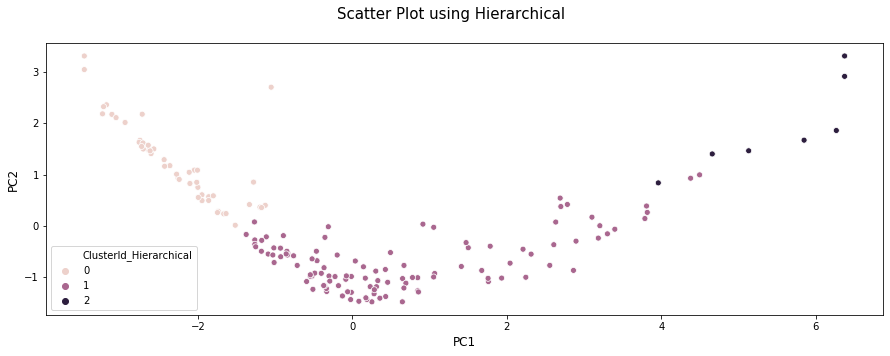

In [59]:
# Checking the cluster formation on the basis of n=3 cluster by using scatter plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Scatter Plot using Hierarchical', fontsize=15)
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'ClusterId_Hierarchical', data = PCA_df_with_ID)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

In [60]:
# Adding created lable ID to the origional dataframe
country_df['ClusterId_Hierarchical'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterId_KMeans,ClusterId_Hierarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1000,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1001,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1002,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1003,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1004,2,1


In [61]:
# Checking the cluster size for hierarchical cluster
country_df['ClusterId_Hierarchical'].value_counts()

1    112
0     48
2      7
Name: ClusterId_Hierarchical, dtype: int64

When we compare both k-Means and Hierarchical, we can that in k-means, data points are mostly equally distributed but in hierachical most of the data points that means countires forms a single cluster, and seems to be randomly distributed. Hecne for our analysis we will consider k-Means to check the dataframe.


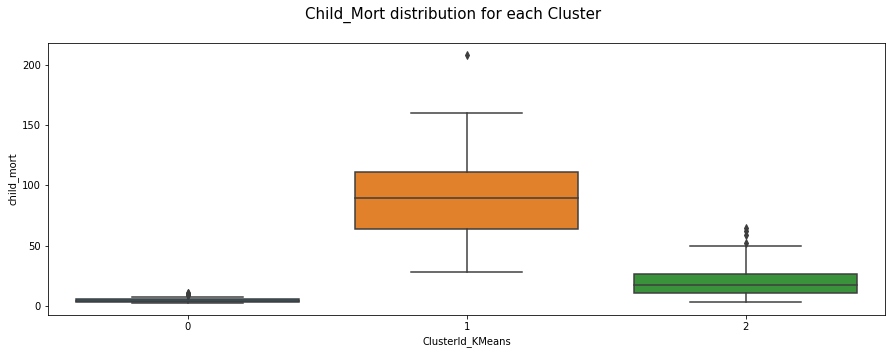

In [62]:
# plots
#sns.boxplot(x='ClusterId_Hierarchical', y='child_mort', data = country_df)
#plt.show()
# Chekcing the distribution of child death for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Child_Mort distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='child_mort', data = country_df)
plt.show()

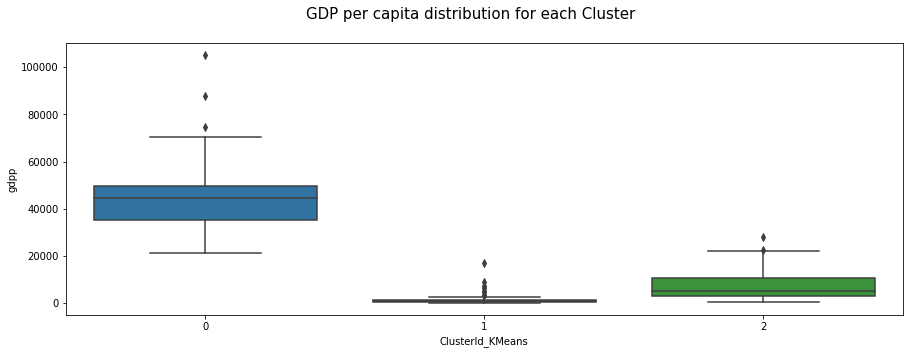

In [63]:
#sns.boxplot(x='ClusterId_Hierarchical', y='gdpp', data = country_df)
#plt.show()
# Chekcing the distribution of total GDP per capita for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('GDP per capita distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='gdpp', data = country_df)
plt.show()

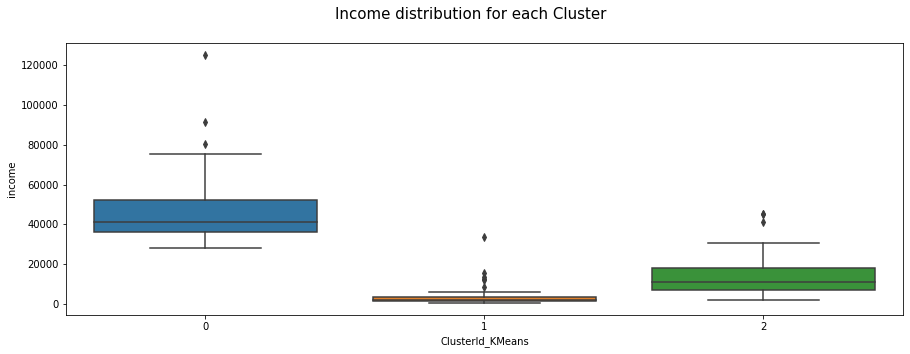

In [64]:
#sns.boxplot(x='ClusterId_Hierarchical', y='income', data = country_df)
#plt.show()
# Chekcing the distribution of income for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Income distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='income', data = country_df)
plt.show()

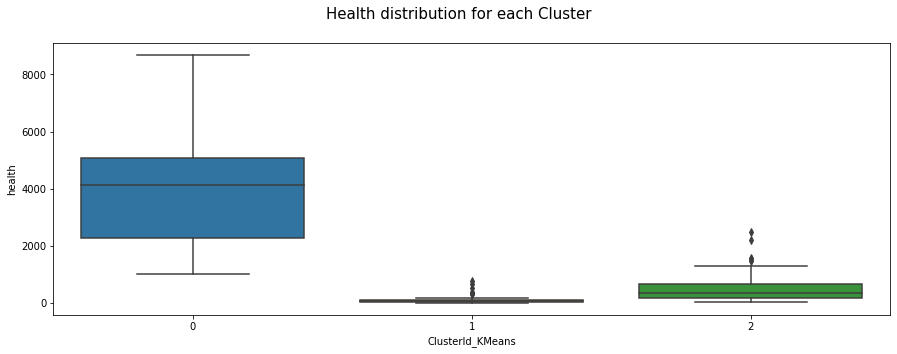

In [65]:
#sns.boxplot(x='ClusterId_Hierarchical', y='health', data = country_df)
#plt.show()
# Chekcing the distribution of health for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Health distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='health', data = country_df)
plt.show()

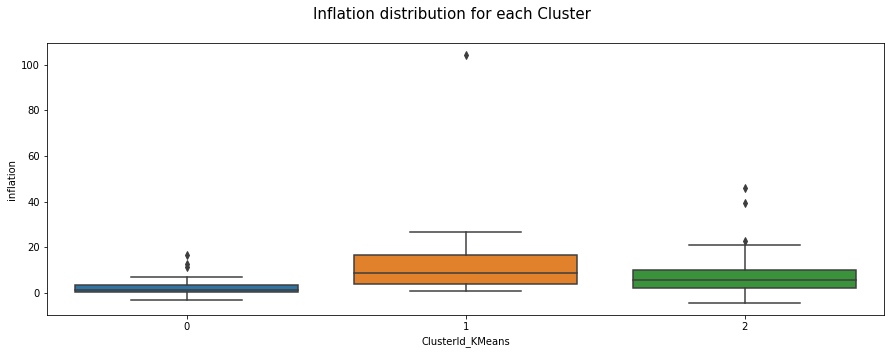

In [66]:
#sns.boxplot(x='ClusterId_Hierarchical', y='inflation', data = country_df)
#plt.show()
# Chekcing the distribution of inflation rate for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Inflation distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='inflation', data = country_df)
plt.show()

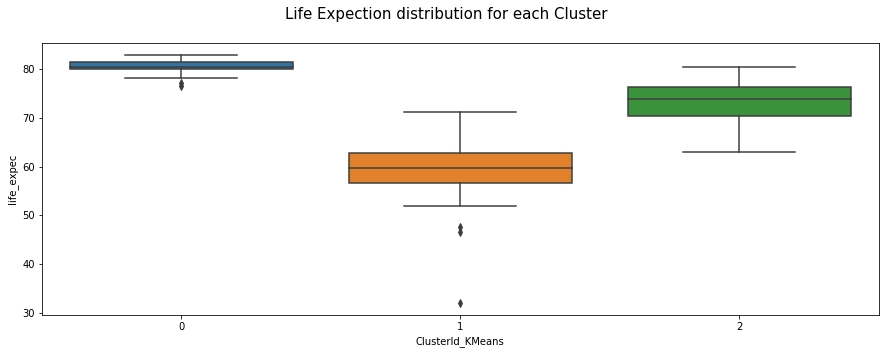

In [67]:
#sns.boxplot(x='ClusterId_Hierarchical', y='life_expec', data = country_df)
#plt.show()
# Chekcing the distribution of life expection for each cluster using box plot
fig = plt.figure()
fig.set_size_inches(15, 5)
fig.suptitle('Life Expection distribution for each Cluster', fontsize=15)
sns.boxplot(x='ClusterId_KMeans', y='life_expec', data = country_df)
plt.show()

In [68]:
#Checking the cluster size
country_df['ClusterId_KMeans'].value_counts()

2    88
1    48
0    31
Name: ClusterId_KMeans, dtype: int64

In [69]:
# Creating a differnt data set which has countries from cluster 1
cluster_2 = country_df[country_df['ClusterId_KMeans']==1]
cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterId_KMeans,ClusterId_Hierarchical
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,1000,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1003,1,0
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,1017,1,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,1021,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,1025,1,0


In [70]:
# Geeting the count of each column
cluster_2.count()

country                   48
child_mort                48
exports                   48
health                    48
imports                   48
income                    48
inflation                 48
life_expec                48
total_fer                 48
gdpp                      48
ID                        48
ClusterId_KMeans          48
ClusterId_Hierarchical    48
dtype: int64

In [71]:
# Chekcing the mean of the few columns which we are considering for our analysis
cluster_2[['child_mort', 'health', 'income', 'inflation','gdpp']].mean()

child_mort      91.610417
health         114.821765
income        3897.354167
inflation       11.911146
gdpp          1909.208333
dtype: float64

In [72]:
#Chekcing the mean of each cluster for the considered features
country_df.groupby('ClusterId_KMeans')[['child_mort', 'income', 'inflation','gdpp']].mean()

,child_mort,income,inflation,gdpp
ClusterId_KMeans,,,,
0,4.935484,48129.032258,2.769903,46067.741935
1,91.610417,3897.354167,11.911146,1909.208333
2,20.918182,13455.568182,7.295045,7332.636364


Looking at the mean of the few columns we can see that cluster 1 is more suitable for our analysis to be given the funds

In [73]:
# Chekcing the 80th quantile to see which cluster we need to consider
country_df.groupby('ClusterId_KMeans')[['child_mort', 'income', 'inflation','gdpp']].quantile(0.80)

,child_mort,income,inflation,gdpp
ClusterId_KMeans,,,,
0,6.20,57600.0,3.83,51900.0
1,115.20,4400.0,16.96,1994.0
2,30.98,19820.0,12.34,11960.0


In [74]:
# Chekcing the 02nd quantile to see which cluster we need to consider
country_df.groupby('ClusterId_KMeans')[['child_mort', 'income', 'inflation','gdpp']].quantile(0.02)

,child_mort,income,inflation,gdpp
ClusterId_KMeans,,,,
0,2.720,28540.00,-2.42800,22480.00
1,36.372,694.54,1.16230,321.24
2,4.048,2354.20,-0.97268,752.80


In [75]:
cluster_2['country'].head()

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

In [76]:
#Sorting our dataframe on the basis of selected features
cluster_2.sort_values(['child_mort', 'income', 'inflation','gdpp'], ascending=[False, True, False, True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterId_KMeans,ClusterId_Hierarchical
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,1066,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,1132,1,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,1032,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,1031,1,0
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,1097,1,0
113,Nigeria,130.0,589.4900,118.1310,405.420,5150,104.000,60.5,5.84,2330,1113,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,1112,1,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1003,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,1037,1,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,1025,1,0


In [77]:
# Getting the country list which are in direst need to aid in sorted order, So we can consider above 5 to 10 counties
cluster_2.sort_values(['child_mort', 'income', 'inflation','gdpp'], ascending=[False, True, False, True])['country']

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
64                Guinea-Bissau
17                        Benin
40                Cote d'Ivoire
49            Equatorial Guinea
63                       Guinea
28                     Cameroon
106                  Mozambique
87                      Lesotho
99                   Mauritania
26                      Burundi
116                    Pakistan
94                       Malawi
150                        Togo
0                   Afghanistan
88                      Liberia
36                      Comoros
166                      Zambia
155                      Uganda
56                       Gambia
84                          Lao
142                       Sudan
59      